# 実験

## 2024/06/04 22:28
    3次元ずつピックアップして3次元空間にプロットしていくと，すべての成分が同じ値だったら一点にプロットされる
    従って，連続した3成分（スライディングウィンドウ）に限らず，3成分をサンプリングして3次元空間で表した結果は，全成分が同じ（その空間での対角線上にある）状態から近いか遠いかが分かる
    全成分が同じなら，各成分が別な意味を表すと考えられる場合，どの意味も含む＝乱数の一様分布状態と考えられる
    文章にノイズを加えていくと，埋め込みベクトルはその状態に近づくだろう
    全成分が同じならフィルトレーション結果はbirth=deathになるので，フィルトレーションで一様乱数から遠いかどうかが分かる
    それ以外の情報，どの方向に遠いかなど分かるかは不明
    

shape: (5, 5)
┌──────────────────┬──────────┬──────────┬──────────┬─────────────────────┐
│ 生物             ┆ 体重(kg) ┆ 体長(cm) ┆ 寿命(年) ┆ 生息地の平均気温(℃) │
│ ---              ┆ ---      ┆ ---      ┆ ---      ┆ ---                 │
│ str              ┆ f64      ┆ f64      ┆ f64      ┆ f64                 │
╞══════════════════╪══════════╪══════════╪══════════╪═════════════════════╡
│ 昆虫（アリ）     ┆ 0.0001   ┆ 0.5      ┆ 1.0      ┆ 25.0                │
│ 鳥（スズメ）     ┆ 0.024    ┆ 15.0     ┆ 3.0      ┆ 20.0                │
│ 猫（家猫）       ┆ 4.5      ┆ 50.0     ┆ 15.0     ┆ 22.0                │
│ 猿（ニホンザル） ┆ 10.0     ┆ 60.0     ┆ 25.0     ┆ 10.0                │
│ 人間             ┆ 70.0     ┆ 170.0    ┆ 80.0     ┆ 18.0                │
└──────────────────┴──────────┴──────────┴──────────┴─────────────────────┘
shape: (5, 7)
┌────────────────┬──────────┬──────────┬──────────┬────────────────┬───────────────┬───────────────┐
│ 生物           ┆ 体重(kg) ┆ 体長(cm) ┆ 寿命(年) ┆ 生息地の平均気 ┆ ベクトル1(体  ┆ ベクトル2(体  │
│ --

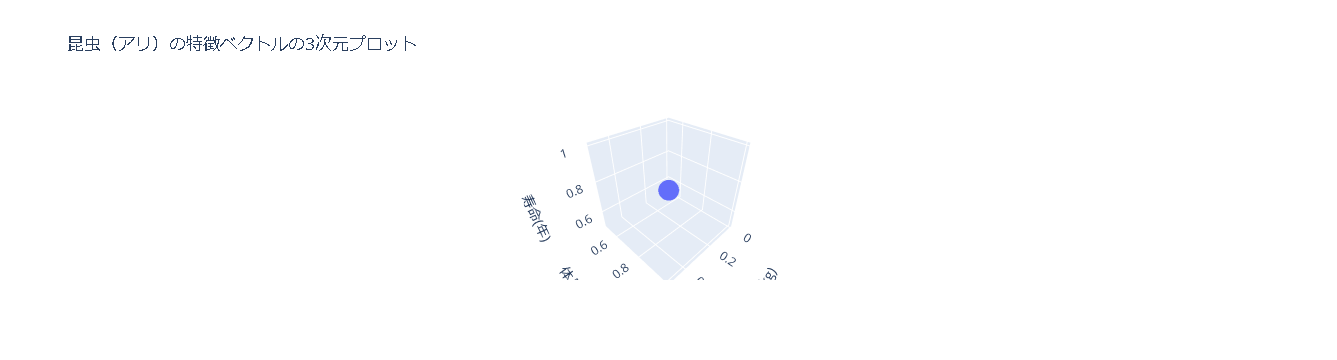

v1= [ 0.024 15.     3.   ]
x= [0.024, 15.0]


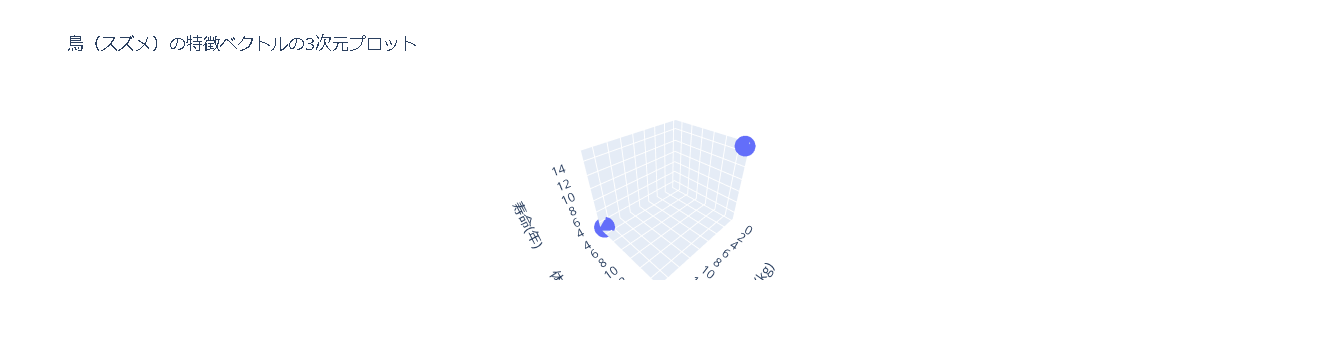

v1= [ 4.5 50.  15. ]
x= [4.5, 50.0]


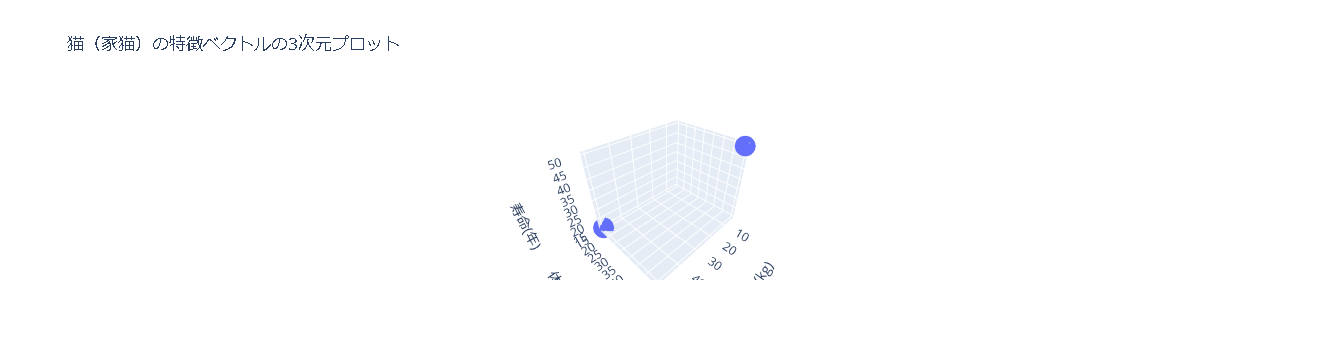

v1= [10. 60. 25.]
x= [10.0, 60.0]


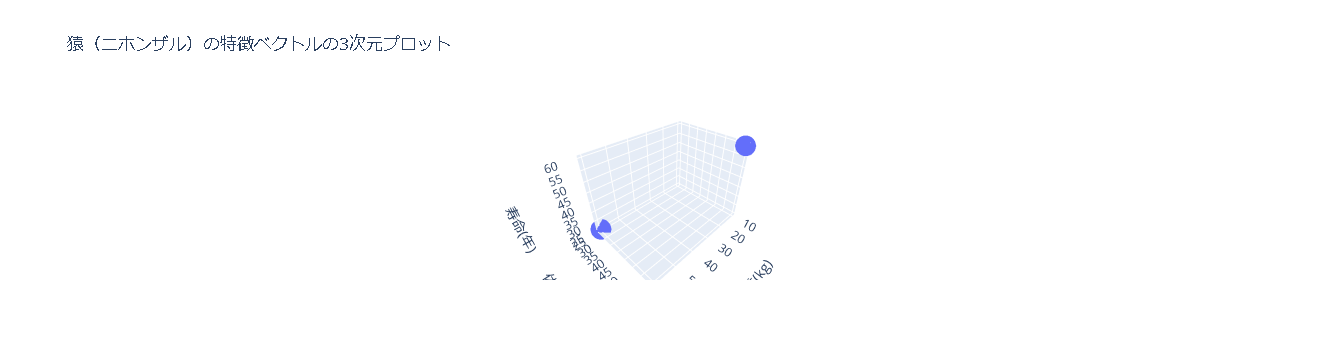

v1= [ 70. 170.  80.]
x= [70.0, 170.0]


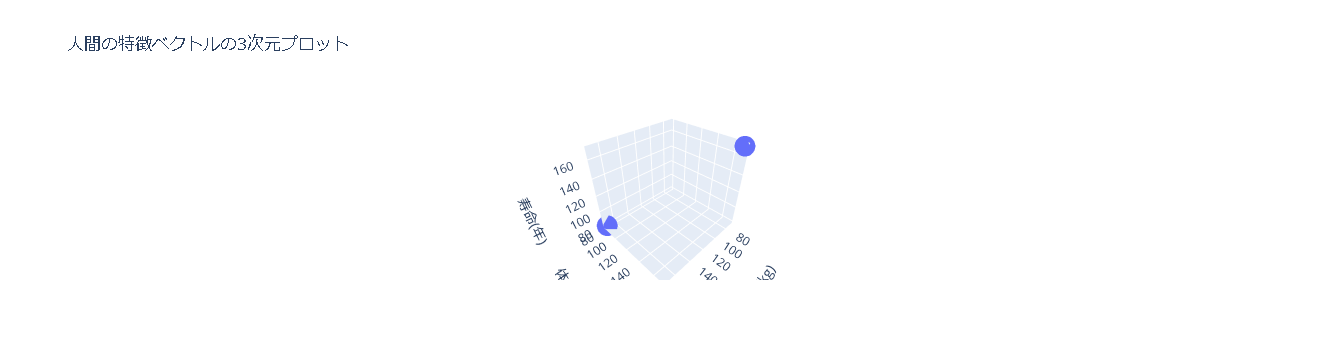

In [15]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# データをリストとして定義
data = [
    ["昆虫（アリ）", 0.0001, 0.5, 1, 25],
    ["鳥（スズメ）", 0.024, 15, 3, 20],
    ["猫（家猫）", 4.5, 50, 15, 22],
    ["猿（ニホンザル）", 10, 60, 25, 10],
    ["人間", 70, 170, 80, 18]
]

# Polarsのデータフレームを作成し、数値をFloat64として設定
df = pl.DataFrame(
    data,
    schema=[
        ("生物", pl.Utf8),
        ("体重(kg)", pl.Float64),
        ("体長(cm)", pl.Float64),
        ("寿命(年)", pl.Float64),
        ("生息地の平均気温(℃)", pl.Float64)
    ]
)

print(df)

# 各行から3次元ベクトルを作成し、新しい列として追加
vector1 = []
vector2 = []

for i in range(df.shape[0]):
    row = df.row(i)
    vector1.append([row[1], row[2], row[3]])  # 体重, 体長, 寿命
    vector2.append([row[2], row[3], row[4]])  # 体長, 寿命, 生息地の平均気温

# 新しい列としてデータフレームに追加
df = df.with_columns([
    pl.Series("ベクトル1(体重, 体長, 寿命)", vector1),
    pl.Series("ベクトル2(体長, 寿命, 生息地の平均気温)", vector2)
])

# 結果を表示
print(df)

# プロットを作成
fig = go.Figure()

for i in range(df.shape[0]):
    fig = go.Figure()
    bio = df["生物"][i]
    v1 = np.array(vector1[i])
    v2 = np.array(vector2[i])
    print("v1=", v1)
    #fig.add_trace(go.Scatter3d(x=v1, y=v2, z=[0, 1, 2], mode='markers', name=bio))
    x = [v1[0], v2[0]]
    y = [v1[1], v2[1]]
    z = [v1[2], v2[2]]
    print("x=", x)
    fig.add_trace(go.Scatter3d(x=x, y=y, z=y, mode='markers', name=bio))

    fig.update_layout(scene=dict(xaxis_title='体重(kg)', yaxis_title='体長(cm)', zaxis_title='寿命(年)'),
                  title=f'{bio}の特徴ベクトルの3次元プロット')
    fig.show()